<a href="https://colab.research.google.com/github/bambadij/xray_linkedin_learning/blob/main/Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SHOULDER iMPLANT X-Ray

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00517/data.zip

--2023-10-02 12:31:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00517/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [   <=>              ]   6.01M  10.7MB/s    in 0.6s    

2023-10-02 12:31:09 (10.7 MB/s) - ‘data.zip’ saved [6306316]



In [3]:
!unzip /content/data.zip

Archive:  /content/data.zip
   creating: data/
  inflating: data/Tornier.53.jpg     
  inflating: data/Cofield.61.jpg     
  inflating: data/Tornier.60.jpg     
  inflating: data/Depuy.15.jpg       
  inflating: data/Depuy.147.jpg      
  inflating: data/Zimmer.123.jpg     
  inflating: data/Zimmer.134.jpg     
  inflating: data/Cofield.40.jpg     
  inflating: data/Cofield.8.jpg      
  inflating: data/Depuy.42.jpg       
  inflating: data/Depuy.295.jpg      
  inflating: data/Tornier.45.jpg     
  inflating: data/Depuy.123.jpg      
  inflating: data/Zimmer.34.jpg      
  inflating: data/Depuy.166.jpg      
  inflating: data/Depuy.249.jpg      
  inflating: data/Tornier.59.jpg     
  inflating: data/Cofield.52.jpg     
  inflating: data/Zimmer.86.jpg      
  inflating: data/Zimmer.8.jpg       
  inflating: data/Depuy.280.jpg      
  inflating: data/Depuy.264.jpg      
  inflating: data/Depuy.36.jpg       
  inflating: data/Depuy.180.jpg      
  inflating: data/Depuy.140.jpg      
  i

In [4]:
# Database connections
import warnings
warnings.filterwarnings('ignore')

# Data handling
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots
import PIL
import tensorflow as tf
from  tensorflow import keras
from  tensorflow.keras import layers
from  tensorflow.keras.models import Sequential

from keras.applications.resnet_v2 import ResNet50V2
from keras.layers import Dropout,Dense,Input
from keras.models import Model,load_model



# EDA (pandas-profiling, etc. )
from statsmodels.genmod.families import Binomial
from scipy.stats import pointbiserialr

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os, pickle

In [5]:
ls /content/data | wc < -1

/bin/bash: line 1: -1: No such file or directory


In [6]:
dir= '/content/data'

In [7]:
Cofield_filepaths= [dir+'/' +file_name for file_name in os.listdir(dir) if 'Cofield' in file_name]
Depuy_filepaths= [dir+'/' +file_name for file_name in os.listdir(dir) if 'Depuy' in file_name]
Tornier_filepaths= [dir+'/' +file_name for file_name in os.listdir(dir) if 'Tornier' in file_name]
Zimmer_filepaths= [dir+'/' +file_name for file_name in os.listdir(dir) if 'Zimmer' in file_name]

In [8]:
print(Cofield_filepaths)
print(Depuy_filepaths)
print(Tornier_filepaths)
print(Cofield_filepaths)

['/content/data/Cofield.61.jpg', '/content/data/Cofield.79.jpg', '/content/data/Cofield.48.jpg', '/content/data/Cofield.67.jpg', '/content/data/Cofield.37.jpg', '/content/data/Cofield.29.jpg', '/content/data/Cofield.47.jpg', '/content/data/Cofield.72.jpg', '/content/data/Cofield.40.jpg', '/content/data/Cofield.11.jpg', '/content/data/Cofield.25.jpg', '/content/data/Cofield.68.jpg', '/content/data/Cofield.16.jpg', '/content/data/Cofield.59.jpg', '/content/data/Cofield.4.jpg', '/content/data/Cofield.42.jpg', '/content/data/Cofield.43.jpg', '/content/data/Cofield.46.jpg', '/content/data/Cofield.83.jpg', '/content/data/Cofield.76.jpg', '/content/data/Cofield.50.jpg', '/content/data/Cofield.80.jpg', '/content/data/Cofield.28.jpg', '/content/data/Cofield.19.jpg', '/content/data/Cofield.34.jpg', '/content/data/Cofield.26.jpg', '/content/data/Cofield.87.jpg', '/content/data/Cofield.51.jpg', '/content/data/Cofield.44.jpg', '/content/data/Cofield.56.jpg', '/content/data/Cofield.38.jpg', '/conten

In [9]:
print(len(Cofield_filepaths))
print(len(Depuy_filepaths))
print(len(Tornier_filepaths))
print(len(Zimmer_filepaths))

83
294
71
149


Split our data on train and test set data

In [10]:
Cofiels_file_paths_train = Cofield_filepaths[:int(len(Cofield_filepaths)*0.8)]
Cofiels_file_paths_test = Cofield_filepaths[:int(len(Cofield_filepaths)*0.2)]
Depuy_filepaths_train = Depuy_filepaths[:int(len(Depuy_filepaths)*0.8)]
Depuy_filepaths_test = Depuy_filepaths[:int(len(Depuy_filepaths)*0.2)]
Tornier_filepaths_train = Tornier_filepaths[:int(len(Tornier_filepaths)*0.8)]
Tornier_filepaths_test= Tornier_filepaths[:int(len(Tornier_filepaths)*0.2)]
Zimmer_filepaths_train = Zimmer_filepaths[:int(len(Zimmer_filepaths)*0.8)]
Zimmer_filepaths_test= Zimmer_filepaths[:int(len(Zimmer_filepaths)*0.2)]

In [11]:
print(len(Cofiels_file_paths_train))
print(len(Cofiels_file_paths_test))
print(len(Depuy_filepaths_train))
print(len(Depuy_filepaths_test))

66
16
235
58


Now create a train set data combine all data train and test set data

In [12]:
train_data_file_path = Cofiels_file_paths_train + Depuy_filepaths_train +Tornier_filepaths_train+Zimmer_filepaths_train
test_data_file_path = Cofiels_file_paths_test + Depuy_filepaths_test +Tornier_filepaths_test +Zimmer_filepaths_test


In [13]:
train_data_label =[]
for filepath in train_data_file_path:
  label = filepath.split('.')[0].rsplit('/')[3]
  train_data_label.append(label)

In [14]:
print(len(train_data_label))
print(train_data_label)

476
['Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy',

In [15]:
test_data_label =[]
for filepath in test_data_file_path:
  label = filepath.split('.')[0].rsplit('/')[3]
  test_data_label.append(label)

In [16]:
print(len(test_data_label))
print(test_data_label)

117
['Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zi

Create Dataframe for train set

In [17]:
Train_df = pd.DataFrame({'train_data_file_path':train_data_file_path,'train_data_label':train_data_label})
Train_df

,train_data_file_path,train_data_label
0,/content/data/Cofield.61.jpg,Cofield
1,/content/data/Cofield.79.jpg,Cofield
2,/content/data/Cofield.48.jpg,Cofield
3,/content/data/Cofield.67.jpg,Cofield
4,/content/data/Cofield.37.jpg,Cofield
...,...,...
471,/content/data/Zimmer.135.jpg,Zimmer
472,/content/data/Zimmer.54.jpg,Zimmer
473,/content/data/Zimmer.87.jpg,Zimmer
474,/content/data/Zimmer.64.jpg,Zimmer


In [22]:
Test_df = pd.DataFrame({'test_data_file_path':test_data_file_path,'test_data_label':test_data_label})
Test_df

,test_data_file_path,test_data_label
0,/content/data/Cofield.61.jpg,Cofield
1,/content/data/Cofield.79.jpg,Cofield
2,/content/data/Cofield.48.jpg,Cofield
3,/content/data/Cofield.67.jpg,Cofield
4,/content/data/Cofield.37.jpg,Cofield
...,...,...
112,/content/data/Zimmer.106.jpg,Zimmer
113,/content/data/Zimmer.83.jpg,Zimmer
114,/content/data/Zimmer.89.jpg,Zimmer
115,/content/data/Zimmer.97.jpg,Zimmer


Let's visualize image with PIL

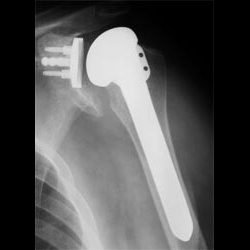

In [18]:
PIL.Image.open(str(train_data_file_path[0]))

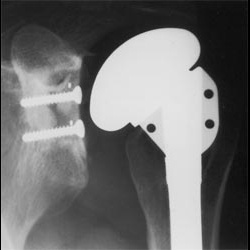

In [19]:
PIL.Image.open(str(train_data_file_path[1]))

Create train generator and test generator using ImageDataGenerator

In [20]:
from tensorflow.python.ops.batch_ops import batch
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.).flow_from_dataframe(
    dataframe=Train_df,
    director='/content/data',
    x_col='train_data_file_path',
    y_col='train_data_label',
    target_size=(256,2560),
    color_mode = 'rgb',
    color_model='categorical',
    batch_size=32,
    shuffle=True,
    seed=123,subset='training'
)

Found 476 validated image filenames belonging to 4 classes.


In [24]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.).flow_from_dataframe(
    dataframe=Test_df,
    director='/content/data',
    x_col='test_data_file_path',
    y_col='test_data_label',
    target_size=(256,2560),
    color_mode = 'rgb',
    color_model='categorical',
    batch_size=32,
    shuffle=True,
    seed=123
)

Found 117 validated image filenames belonging to 4 classes.


Now Show more target

In [25]:
class_dict =train_generator.class_indices
class_dict
key_list = list(class_dict.keys())
value_lst = list(class_dict.values())

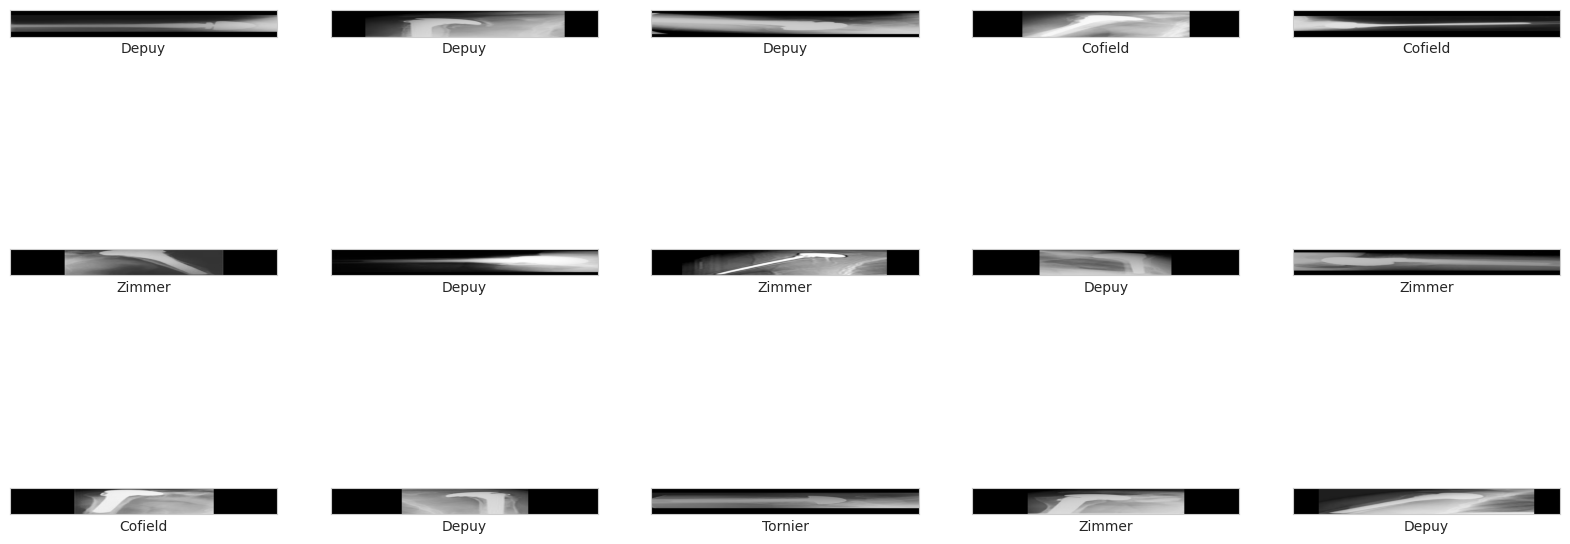

In [27]:
plt.figure(figsize=(20,15))
images,encoded_labels = next(train_generator)
labels =np.argmax(encoded_labels,axis=1)
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images[i])
  plt.xlabel(key_list[labels[i]])
plt.show()

In [48]:
for image_batch,labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 2560, 3)
(32, 4)


Xray Manufacturer Classifier using Convolution Neural Network(CNN)

In [53]:
, Flatten
from keras.src.layers import Conv2D
num_class =len(class_dict)
model = Sequential([
    layers.Rescaling(1./255,input_shape=(256,256,3)),
    layers.Conv2D(16,3,padding='same',activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_class)
                    ])

In [59]:
from sqlalchemy.sql.operators import from_
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      9280      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 262144)           

Now training our model using epochs=20

In [64]:
epochs=10
history =model.fit(train_generator,epochs=20)

Epoch 1/20


InvalidArgumentError: ignored

In [67]:
data_argumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [68]:
model = Sequential([
    layers.Rescaling(1./255,input_shape=(256,256,3)),
    data_argumentation,
    layers.Conv2D(16,3,padding='same',activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_class)
                    ])

In [69]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      9280      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                 

Now training all data

In [71]:
model.evaluate(test_generator)

InvalidArgumentError: ignored

In [72]:
model.predict(test_generator)

InvalidArgumentError: ignored

In [73]:
epochs=20
history = model.fit(train_generator,epochs=epochs)

Epoch 1/20


InvalidArgumentError: ignored